In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 


In [9]:
sales = pd.read_csv('retail_sales_10000.csv')
store = pd.read_csv('stores_50.csv')
merged = pd.read_csv('merged_data.csv')

C:\Users\rohis\AppData\Local\Temp\ipykernel_23960\983187459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x='region', y='revenue', palette='viridis')


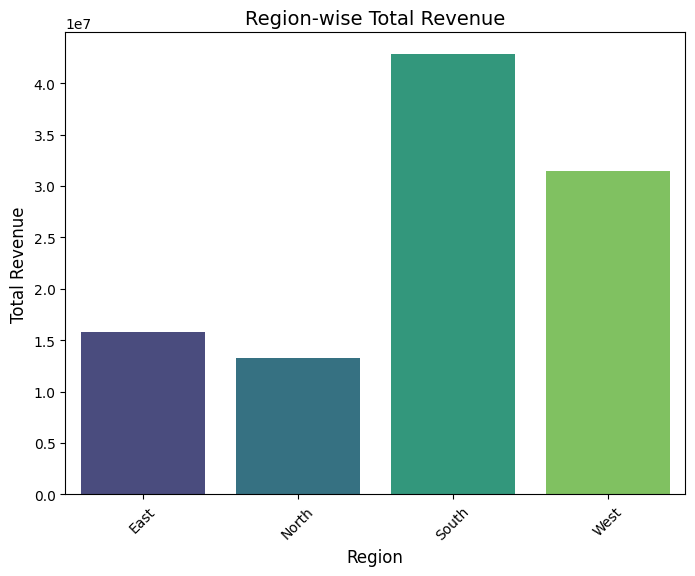

In [8]:
region_revenue = merged.groupby('region')['revenue'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=region_revenue, x='region', y='revenue', palette='viridis')
plt.title("Region-wise Total Revenue", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()


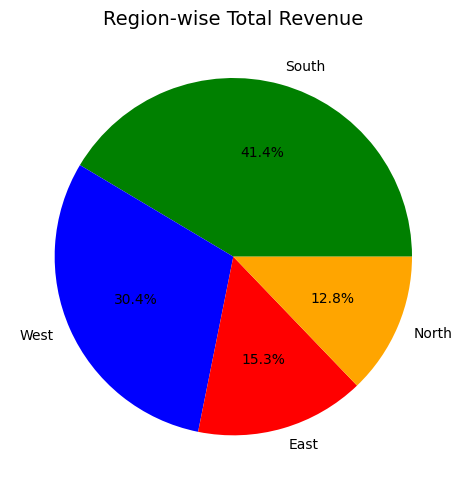

In [19]:
region_revenue = merged.groupby('region')['revenue'].sum().reset_index()
region_revenue = region_revenue.sort_values('revenue', ascending=False)

plt.figure(figsize=(8,5))
plt.pie(region_revenue['revenue'],labels=region_revenue['region'],autopct= '%1.1f%%', colors = ['green','blue','red','orange'])
plt.title("Region-wise Total Revenue", fontsize=14)
plt.tight_layout()
plt.show()


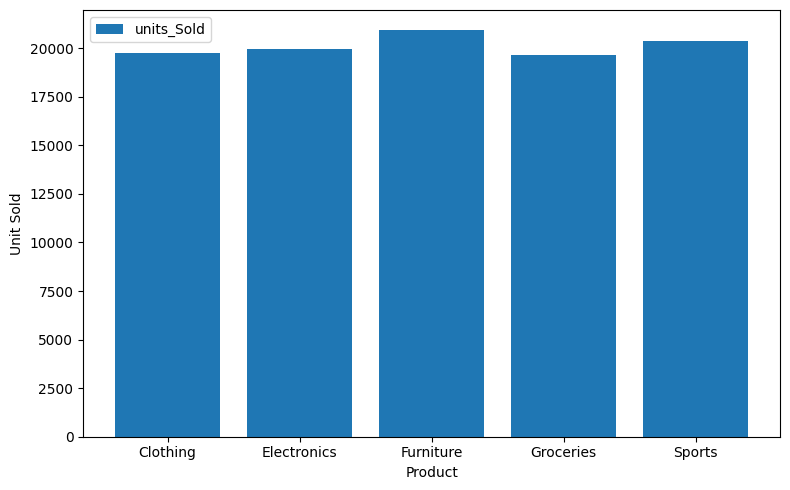

In [ ]:
unit_solds= merged.groupby('product_category')['units_sold'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(unit_solds['product_category'],unit_solds['units_sold'], label='units_Sold')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Product')
plt.ylabel('Unit Sold')
plt.tight_layout()
plt.show()

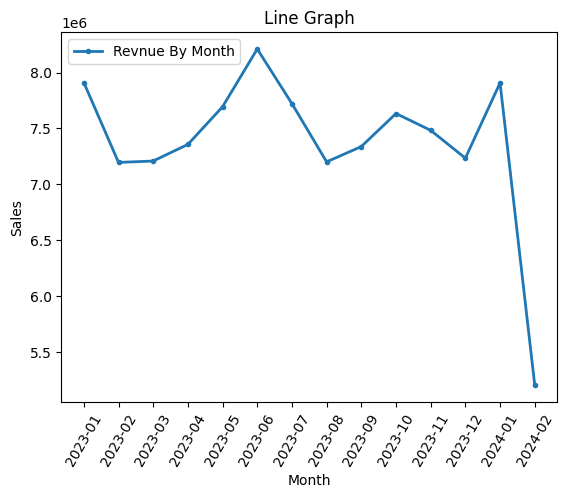

In [24]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.to_period('M')  

revenue_by_month = merged.groupby('month')['revenue'].sum().reset_index()
plt.plot(revenue_by_month["month"].astype(str),revenue_by_month["revenue"],linestyle="-",marker=".",linewidth=2,label="Revnue By Month")
plt.title("Line Graph")
plt.xlabel("Month")
plt.ylabel('Sales')
plt.legend(loc="upper left")
plt.xticks(rotation=60)
plt.show()



In [ ]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.to_period('M')  

revenue_by_month = merged.groupby('month')['revenue'].sum().reset_index()
plt.plot(revenue_by_month["month"].astype(str),revenue_by_month["revenue"],linestyle="-",marker=".",linewidth=2,label="")
plt.title("Line Graph")
plt.xlabel("Month")
plt.ylabel('Sales')
plt.legend(loc="upper left")
plt.xticks(rotation=60)
plt.show()



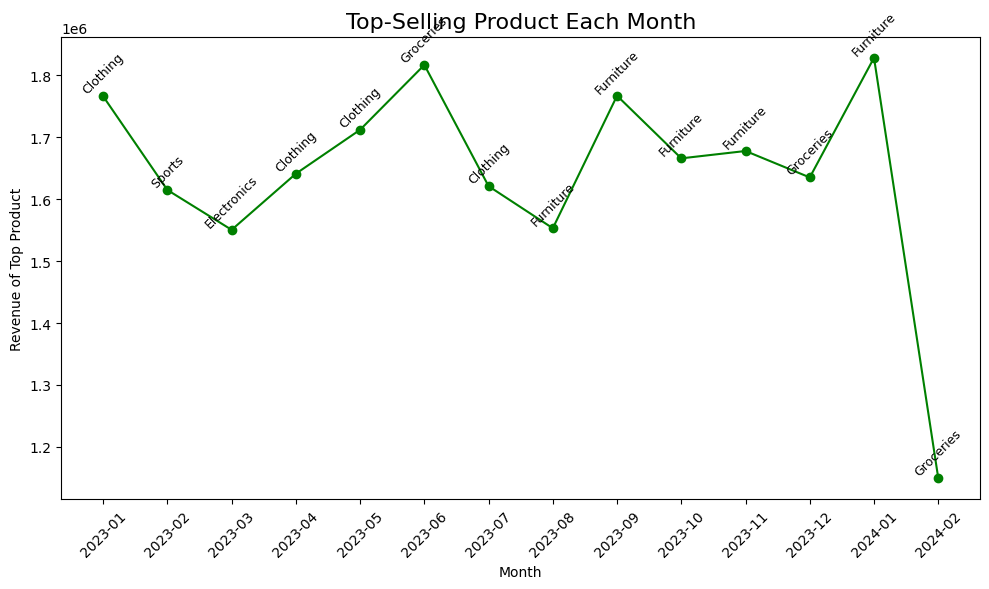

In [33]:
monthly_product = merged.groupby(['month', 'product_category'])['revenue'].sum().reset_index()
top_products = monthly_product.loc[monthly_product.groupby('month')['revenue'].idxmax()]
plt.figure(figsize=(10,6))
plt.plot(top_products['month'].astype(str), top_products['revenue'], marker='o', color='green')
for i, row in top_products.iterrows():
    plt.text(row['month'].strftime('%Y-%m'), row['revenue'], row['product_category'], 
             ha='center', va='bottom', fontsize=9, rotation=45)
plt.title("Top-Selling Product Each Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Revenue of Top Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
